*GROUP 5 - ARIMA*
---
---
* Nguyễn Nhất Thưởng - 20522000
* Lê Quang Hoà - 20521331
* Kiều Xuân Diệu Hương - 20521381
---

Tóm Tắt:


**IMPORT LIBRARY**
---
---


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

**READ DATA**
---
---

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Team5-PAPERREPORT/Data/DATA(2002-2022).csv',parse_dates = ['Date'],index_col = ['Date'])
df

,Prices
Date,
2002-01-01,4170449.50
2002-01-02,4198629.19
2002-01-03,4206113.25
2002-01-04,4190692.00
2002-01-07,4203514.59
...,...
2022-04-04,44102530.37
2022-04-05,44470144.87
2022-04-06,44137702.89


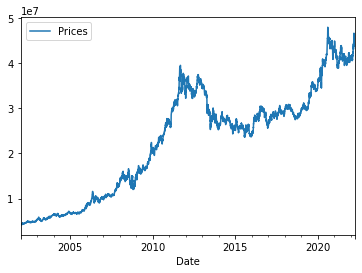

In [5]:
df.plot()

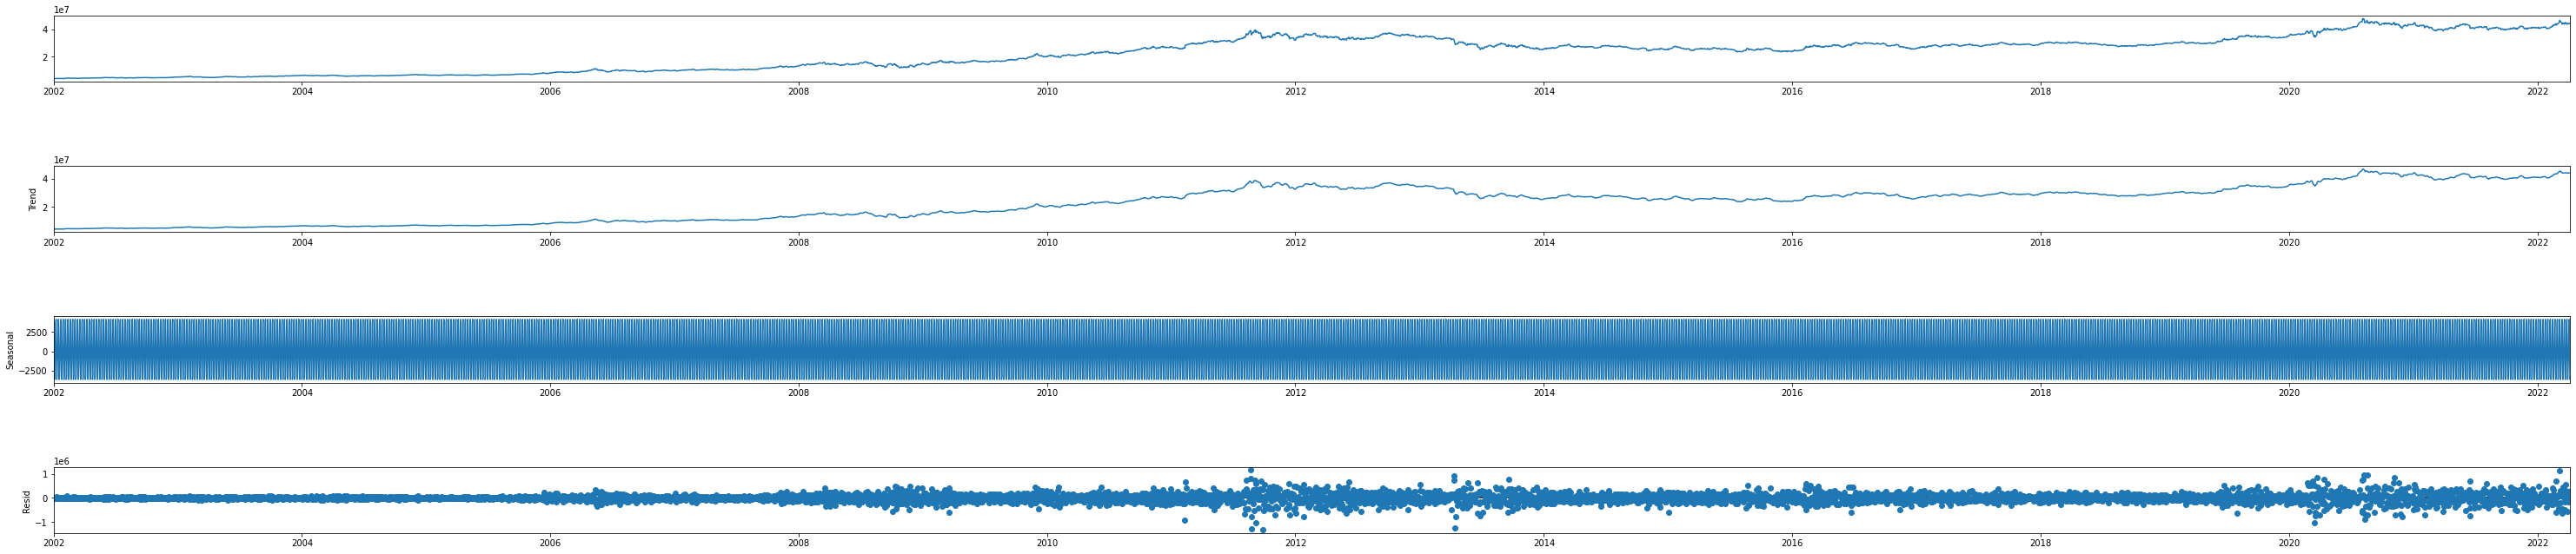

In [6]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df,model = 'additive')
fig = decomposition.plot()
fig.set_size_inches(50, 10)

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.370760
p-value: 0.914868


In [8]:
len(df)

5289

In [9]:
train = df[:4231]
test = df[4231:]


In [10]:
import itertools

In [10]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [11]:
pdq_combination = list(itertools.product(p,d,q))

In [12]:
len(pdq_combination)

128

In [13]:
rmse=[]
order1=[]

In [ ]:
for pdq in pdq_combination:
  try:
    model = ARIMA(train,order=pdq).fit()
    pred=model.predict(start=len(train),end=(len(df)-1))
    error = np.sqrt(mean_squared_error(test,pred))
    order1.append(pdq)
    rmse.append(error)
  except:
    continue

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [ ]:
results = pd.DataFrame(index = order1,data=rmse,columns = ['RMSE'])

In [ ]:
results.to_csv('ARima_result.csv')

In [13]:
model = ARIMA(train,order=(5,0,4)).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency B will be use

In [14]:
print(model.summary())

                              ARMA Model Results                              
Dep. Variable:                 Prices   No. Observations:                 4231
Model:                     ARMA(5, 4)   Log Likelihood              -58463.999
Method:                       css-mle   S.D. of innovations                nan
Date:                Thu, 05 Jan 2023   AIC                         116949.998
Time:                        00:35:21   BIC                         117019.850
Sample:                    01-01-2002   HQIC                        116974.689
                         - 03-20-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.924e+07        nan        nan        nan         nan         nan
ar.L1.Prices    -0.7296   5.87e-06  -1.24e+05      0.000      -0.730      -0.730
ar.L2.Prices     0.1552   2.16e-06   7.18e+0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


# Mục mới

In [15]:
pred = model.predict(start=len(train),end=(len(df)-1))

In [ ]:
len(pred)

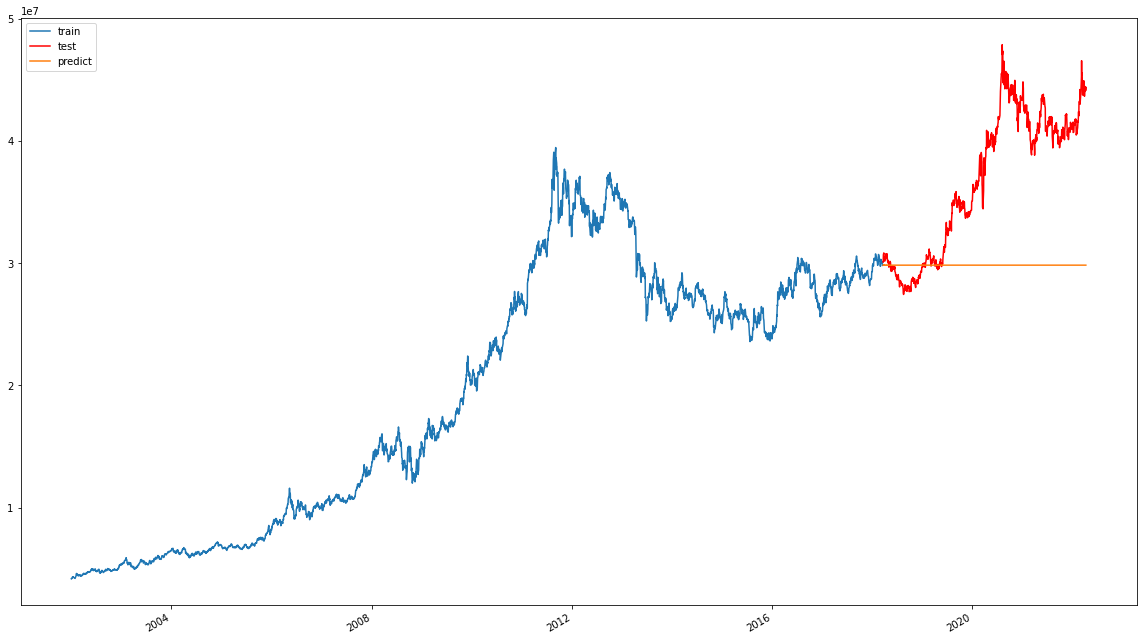

In [16]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
# train.plot(legend = True,label = 'train',figsize = (10,6))
# pred.plot(legend = True,label = 'predict',figsize = (10,6))
# test.plot(legend = True,label = 'test',figsize = (10,6))

plt.plot(train.index, train['Prices'],label = 'train')
plt.plot(test.index, test['Prices'], color='r',label = 'test')
pred.plot(label = 'predict',figsize = (20,12))
plt.legend()

In [ ]:
model = ARIMA(df,order=(5,0,4)).fit()

In [ ]:
prediction = model.predict(len(df),len(df) + 30)
prediction

In [ ]:

prediction.plot(legend = True,label = 'prediction')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
mape = mean_absolute_percentage_error(test, pred)
mse = mean_squared_error(test, pred)
rmse = np.sqrt(mse)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")